In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Linear Regression/salaryData.csv')

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
data.shape

(31, 2)

In [9]:
data.rename({'YearsExperience':'Experience'},axis=1,inplace=True)

In [10]:
data.head()

,Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [11]:
data.describe()

,Experience,Salary
count,31.000000,31.000000
mean,5.525806,80002.903226
std,3.030618,34963.913711
min,1.100000,37731.000000
25%,3.200000,56799.500000
50%,4.900000,66029.000000
75%,8.050000,103442.000000
max,11.900000,200000.000000


Text(0, 0.5, 'Salary')

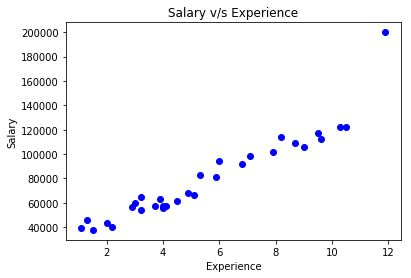

In [12]:
plt.scatter(data['Experience'],data['Salary'],color='Blue')
plt.title('Salary v/s Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')

In [15]:
# Extract independent variable
exp=data.iloc[:,0].values
print(exp)
print(type(exp))
print()

# Extract dependent variable
sal=data.iloc[:,1].values
print(sal)
print(type(sal))

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.9]
<class 'numpy.ndarray'>

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 200000]
<class 'numpy.ndarray'>


In [16]:
expTrain, expVal, salTrain, salVal = train_test_split(exp, sal, test_size = 0.2, random_state = 0)

In [42]:
print("expTrain:\n",expTrain)
print(type(expTrain))
print("-------------------------------")
print("expVal:\n",expVal)
print(type(expVal))
print("-------------------------------")
print("salTrain:\n",salTrain)
print(type(salTrain))
print("-------------------------------")
print("salVal:\n",salVal)
print(type(salVal))

expTrain:
 [[ 4. ]
 [ 5.3]
 [ 8.2]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.7]
 [ 6.8]
 [ 1.3]
 [11.9]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [10.3]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9.5]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
<class 'numpy.ndarray'>
-------------------------------
expVal:
       0
0   1.5
1  10.5
2   4.1
3   3.9
4   9.6
5   9.0
6   7.9
<class 'pandas.core.frame.DataFrame'>
-------------------------------
salTrain:
 [ 55794  83088 113812  56642  66029  64445  61111 109431  91738  46205
 200000  60150  39891  81363 122391  93940  57189  54445 116969  43525
  39343  98273  67938  56957]
<class 'numpy.ndarray'>
-------------------------------
salVal:
 [ 37731 121872  57081  63218 112635 105582 101302]
<class 'numpy.ndarray'>


In [21]:
print(expTrain.ndim)
print(expTrain.shape)

1
(24,)


In [23]:
expTrain=expTrain.reshape((24,1))
print(expTrain.shape)

(24, 1)


In [25]:
expVal=pd.DataFrame(expVal)
print(expVal.shape)

(7, 1)


In [26]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()

In [27]:
linearRegressor.fit(expTrain, salTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# salary = beta0 + beta1* YearsExperience + error

beta0 = linearRegressor.intercept_
beta1 = linearRegressor.coef_

print(beta0, type(beta0),"\n")
print(beta1, type(beta1))

17116.49933095064 <class 'numpy.float64'> 

[11777.8286543] <class 'numpy.ndarray'>


In [ ]:
# salary_predicted =  ( beta0 + beta1* YearsExperience)

In [34]:
salary_predicted = linearRegressor.predict(expVal)
print(expVal)
print(salary_predicted)

      0
0   1.5
1  10.5
2   4.1
3   3.9
4   9.6
5   9.0
6   7.9
[ 34783.24231241 140783.70020115  65405.5968136   63050.03108274
 130183.65441227 123116.95721969 110161.34569996]


In [35]:
# Let's check manually for 1st value

beta0 + (beta1 * 1.5)

# This matches with the 1st value in the 'salary_predicted' array corresponding to 1.5 of expVal

array([34783.24231241])

RMSE - Root Mean Squared Error
Formula = Sqaure root (( actual - Predicted) ^2 ) / total observation)

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
print('Root Mean Squared Error:' )
np.sqrt(mean_squared_error(salVal, salary_predicted))

Root Mean Squared Error:


12703.131268414472

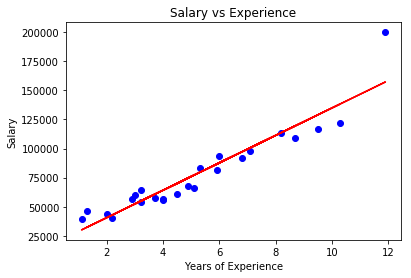

In [38]:
plt.scatter(expTrain, salTrain, color = 'Blue')
plt.plot(expTrain,linearRegressor.predict(expTrain), color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Let's try again after rounding-off years and excluding the outlier

In [45]:
exp=data.iloc[:,0].values
print(exp)

exp=np.round(exp,0)

print(exp)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.9]
[ 1.  1.  2.  2.  2.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  5.  5.  5.
  6.  6.  7.  7.  8.  8.  9.  9. 10. 10. 10. 10. 12.]


In [48]:
# Excluding outlier

print(data.tail()) # last record is outlier

data=data.iloc[:30,:]

print(data.tail()) #outlier is now excluded

    Experience  Salary
25         9.0  105582
26         9.5  116969
27         9.6  112635
28        10.3  122391
29        10.5  121872
    Experience  Salary
25         9.0  105582
26         9.5  116969
27         9.6  112635
28        10.3  122391
29        10.5  121872


In [49]:
# Creating variables again
exp = data.iloc[:, 0].values
salary = data.iloc[:, 1].values

In [50]:
expTrain, expVal, salTrain, salVal = train_test_split(exp, salary, test_size = 0.2, random_state = 0)

In [51]:
# Converting to data frame 2D
(expTrain,expVal) = (pd.DataFrame(expTrain),pd.DataFrame(expVal))

In [52]:
expTrain.shape,expVal.shape

((24, 1), (6, 1))

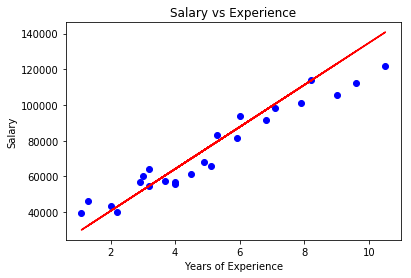

In [53]:
plt.scatter(expTrain, salTrain, color = 'Blue')
plt.plot(expTrain,linearRegressor.predict(expTrain), color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [58]:
expVal=pd.DataFrame(expVal)
salary_predicted = linearRegressor.predict(expVal)
print('Root Mean Squared Error:' )
np.sqrt(mean_squared_error(salVal, salary_predicted))

Root Mean Squared Error:


9858.734042834045

In [65]:
# Function to do all the above:

def salary_predictor(xTrain, xVal, yTrain, yVal):
    global linearRegressor
    linearRegressor = LinearRegression()
    linearRegressor.fit(xTrain, yTrain)
    yPrediction = linearRegressor.predict(xVal)
    plt.scatter(xTrain, yTrain, color = 'red')
    plt.plot(xTrain,linearRegressor.predict(xTrain), color = 'blue')
    plt.title('Salary vs Experience (Training set)')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()
    print('Root Mean Squared Error :' )
    return np.sqrt(mean_squared_error(yVal, yPrediction))

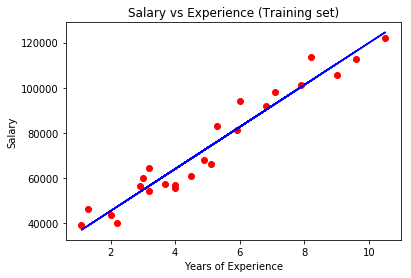

Root Mean Squared Error :


3580.979237321345

In [66]:
salary_predictor(xTrain = expTrain , xVal = expVal , yTrain = salTrain, yVal = salVal)

In [70]:
# Let's try our model on a new CSV file with new data

experience=pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Linear Regression/newdata.csv')

In [71]:
experience

,experience
0,7.6
1,4.0


In [73]:
experience = np.round(experience)

experience

,experience
0,8.0
1,4.0


In [74]:
linearRegressor.predict(experience)

array([101280.70016446,  64030.39965754])

Section below from: https://www.youtube.com/watch?v=E5RjzSK0fvY&t=2s

y = mx + c



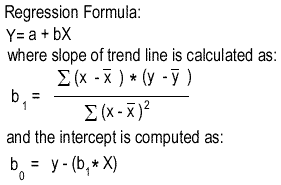

So, m = b1
and c = a

Once b (i.e.m) is calculated, put it in the 2nd equation. y = mx + c. Take y as mean of y, m as calculated, x as mean of x. Then you can find value of 'c'.

R^2 = E(Yp - ymean)^2 / E(y-ymean)^2
Yp = value of Y from calculated equation
Y = actual value of Y in observation

The closer R^2 is to 1, the better.

In [95]:
from statistics import mean 
age = [1,2,3,4,5,6,7,8] #independent variable
salary = [10,13,14,14,15,16,20,21] #dependent variable

In [96]:
age_mean = mean(age)
salary_mean = mean(salary)
n=len(age)

In [98]:
# calculate numerator

numer = 0

for i in range(n):
    numer += (age[i] - age_mean) * (salary[i] - salary_mean)
    
print("Numerator:",numer)

Numerator: 59.5


In [99]:
# calculate denominator

denom = 0

for i in range(n):
    denom += (age[i] - age_mean) ** 2
    
print("Denominator:", denom)

Denominator: 42.0


In [107]:
# Hence, m = numer / denom

m = numer / denom

print(m)

# Y = mX + c. That means, c = Y - mX
c = salary_mean - (m * age_mean)

print(c)

1.4166666666666667
9.0


In [ ]:
# Equation is: Y = 1.4167X + 9

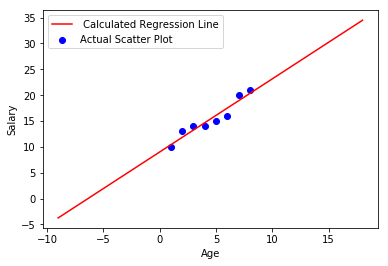

In [111]:
max_age = max(age) + 10
min_age = min(age) - 10

age_calculated = np.linspace(min_age,max_age,1000)
salary_calculated = (m*age_calculated) + c

plt.plot(age_calculated,salary_calculated,color='red', label=' Calculated Regression Line')

plt.scatter(age,salary,color='blue',label='Actual Scatter Plot')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [114]:
# Let's find out R2

r2_numer=0
r2_denom=0

for i in range(n):
    salary_prediction = (m*age[i]) + c
    r2_numer += (salary[i] - salary_prediction) ** 2
    r2_denom += (salary[i] - salary_mean) ** 2
    
print("R2:",1 - r2_numer/r2_denom)

R2: 0.9174603174603175


In [123]:
# Let's calculate using SCIKIT LEARN

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

age=np.reshape(age,(8,1))
salary=np.reshape(salary,(8,1))

reg = LinearRegression()

reg = reg.fit(age,salary)

#salary_pred = reg.predict(age)

#mse = mean_squared_error(salary,salary_pred)

r2_score=reg.score(age,salary)

#print('mse:',mse)
print('r2_score:',r2_score)

r2_score: 0.9174603174603173
